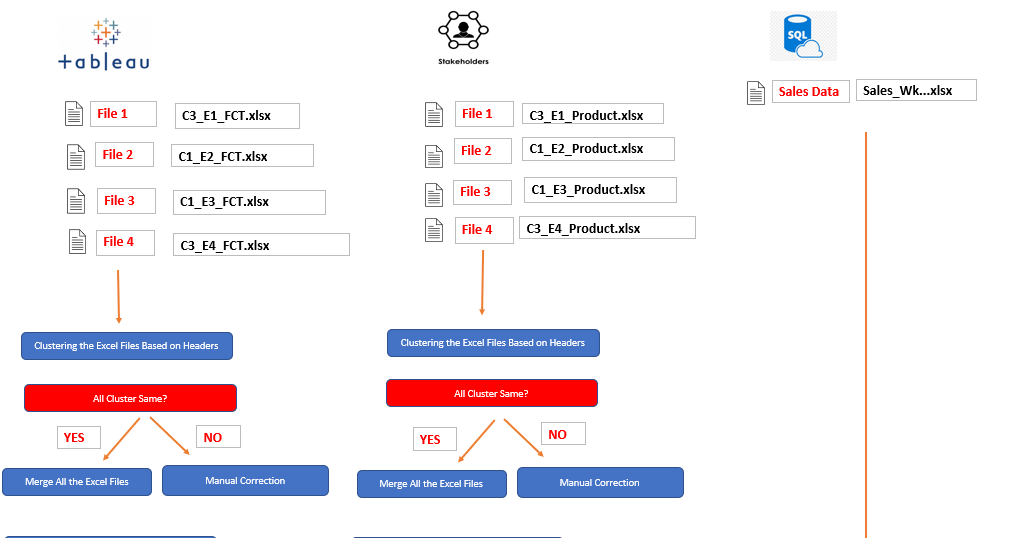



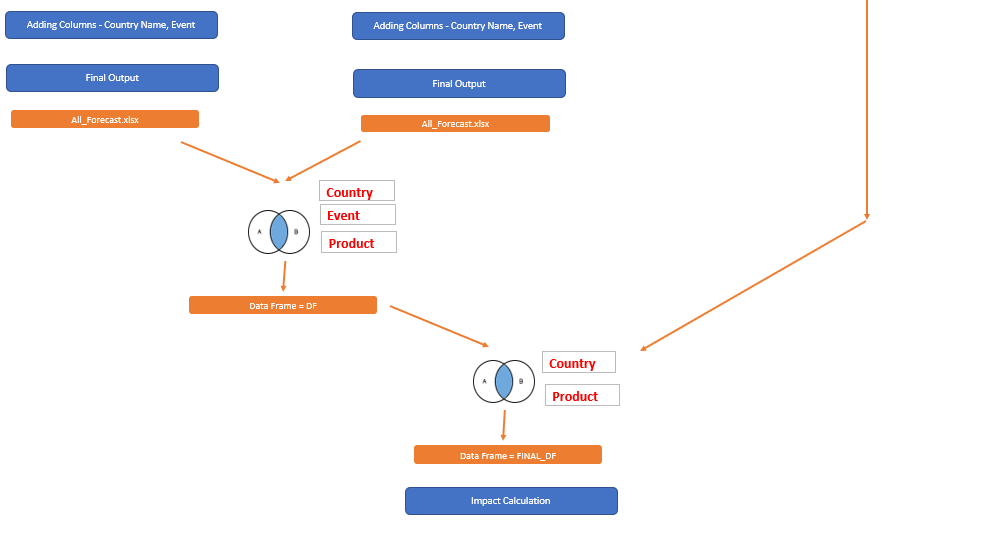

## Importing All the File Names

In [12]:
import os
import pandas as pd
file_path = r'C:\Users\Personal Data\Project\Compiler\Forecast'
#file_path = r'C:\Users\\Personal Data\Project\Compiler\Product'
files = os.listdir(file_path)
files

['C3_E2_FCT.xlsx', 'C3_E3_FCT.xlsx']

## Defining the mid function 
## and 
## creating dataframe with column name -file name - country - event

In [13]:

def mid(s, offset, amount):
    return s[offset:offset+amount]
file_df = pd.DataFrame(files, columns =['File_Name'])
file_df['Country'] = file_df['File_Name'].map(lambda x:x[0:x.find("_")])
file_df['Event'] = file_df['File_Name'].map(lambda x:mid(x,x.find('_')+1,x.find('_',3)-x.find('_')-1))
file_df

,File_Name,Country,Event
0,C3_E2_FCT.xlsx,C3,E2
1,C3_E3_FCT.xlsx,C3,E3


## creating the list of all file name with path

In [14]:
import glob
file_list = glob.glob(r"C:\Users\Personal Data\Project\Compiler\Forecast\*.xlsx")
#file_list = glob.glob(r"C:\Users\Personal Data\Project\Compiler\Product\*.xlsx")
file_list

['C:\\Users\\IN22916549\\OneDrive - Tesco\\Desktop\\Personal Data\\Project\\Compiler\\Forecast\\C3_E2_FCT.xlsx',
 'C:\\Users\\IN22916549\\OneDrive - Tesco\\Desktop\\Personal Data\\Project\\Compiler\\Forecast\\C3_E3_FCT.xlsx']

## Importing all the excel file at once and listing all the column names

In [15]:
py_data=[]
for i in range(len(file_list)):
    print(i)
    py_data.append(pd.read_excel(file_list[i],skiprows=0).columns.values)
print(py_data)

#dataframe to list

for i in range (len(py_data)):
    py_data[i]=list(py_data[i])
py_data

0
1
[array(['Country', 'TimeV2', 'Department', 'Section', 'Group', 'Subgroup',
       'Product_ID (copy)', 'product_id', 'Forecast Units',
       'Forecast Sales excl VAT'], dtype=object), array(['Country', 'TimeV2', 'Department', 'Section', 'Group', 'Subgroup',
       'Product_ID (copy)', 'product_id', 'Forecast Units',
       'Forecast Sales excl VAT'], dtype=object)]


[['Country',
  'TimeV2',
  'Department',
  'Section',
  'Group',
  'Subgroup',
  'Product_ID (copy)',
  'product_id',
  'Forecast Units',
  'Forecast Sales excl VAT'],
 ['Country',
  'TimeV2',
  'Department',
  'Section',
  'Group',
  'Subgroup',
  'Product_ID (copy)',
  'product_id',
  'Forecast Units',
  'Forecast Sales excl VAT']]

## Removing duplicate column names

In [16]:
unique_col=[]
for i in range (len(py_data)):
    if py_data[i] not in unique_col:
        unique_col.append(py_data[i])
unique_col

[['Country',
  'TimeV2',
  'Department',
  'Section',
  'Group',
  'Subgroup',
  'Product_ID (copy)',
  'product_id',
  'Forecast Units',
  'Forecast Sales excl VAT']]

## Clustering the documents based on the header names

In [17]:
for i in range(len(unique_col)):
    for j in range(len(py_data)):
        if py_data[j]==unique_col[i]:
            print(file_df['File_Name'][j],'|','cluster',i+1 )

C3_E2_FCT.xlsx | cluster 1
C3_E3_FCT.xlsx | cluster 1


## Merging all the files

In [18]:
py_data=[]
for i in range(len(file_list)):
    print(i)
    py_data.append(pd.read_excel(file_list[i]))
py_data

df_final=py_data[0]
for i in range(len(py_data)-1):
    df_final=pd.concat([df_final,py_data[i+1]])
df_final

0
1


,Country,TimeV2,Department,Section,Group,Subgroup,Product_ID (copy),product_id,Forecast Units,Forecast Sales excl VAT
0,C3,f2022p03,0011 Bakery,1101 ISB_Bakery,0013 ISB_Morning_goo,0011 Light,4004243098166 TL Farmer Bun 85 g,4004243098166 TL Farmer Bun 85 g,1594,788
1,C3,f2022p03,0011 Bakery,1101 ISB_Bakery,0013 ISB_Morning_goo,0013 Multigrain,4004243107260 TLF PROTEIN BAGUETTE 110 g,4004243107260 TLF PROTEIN BAGUETTE 110 g,2129,599
2,C3,f2022p03,0011 Bakery,1101 ISB_Bakery,0013 ISB_Morning_goo,0014 Snacks,4004242428244 TL Bun Farmer 85 g,4004242428244 TL Bun Farmer 85 g,27935,13813
3,C3,f2022p03,0011 Bakery,1101 ISB_Bakery,0013 ISB_Morning_goo,0014 Snacks,4004243078650 TL Farmer Bun Extra 85 g,4004243078650 TL Farmer Bun Extra 85 g,29432,14553
4,C3,f2022p03,0011 Bakery,1101 ISB_Bakery,0013 ISB_Morning_goo,0014 Snacks,4004243110750 TL Baguette with Sausage 130 g,4004243110750 TL Baguette with Sausage 130 g,2616,1851
...,...,...,...,...,...,...,...,...,...,...
1062,C3,f2022p03,0421 Toys & Nursery,0451 Vehicles,0020 Plastic,0025 Plastic,4010200000000,4010200000000,10,85
1063,C3,f2022p03,0421 Toys & Nursery,0451 Vehicles,0020 Plastic,0025 Plastic,4010200000000,4010200000000,2,20
1064,C3,f2022p03,0421 Toys & Nursery,0451 Vehicles,0020 Plastic,0025 Plastic,4010200000000,4010200000000,7,62
1065,C3,f2022p03,0421 Toys & Nursery,0451 Vehicles,0500 Others,0505 Others,4010200000000,4010200000000,2,16


## Adding country and event name to the dataframe

In [19]:
event_name=[]
country_name = []
num_rows = file_df['File_Name']
Country = file_df['Country']
Event = file_df['Event']

for i in range (len(num_rows)):
    for j in range (len(py_data[i])):
        event_name.append(Event[i])
        country_name.append(Country[i])

df_final['Country_Name'] =country_name
df_final['Event']=event_name

## Merged file

In [20]:
df_final.head(3)

,Country,TimeV2,Department,Section,Group,Subgroup,Product_ID (copy),product_id,Forecast Units,Forecast Sales excl VAT,Country_Name,Event
0,C3,f2022p03,0011 Bakery,1101 ISB_Bakery,0013 ISB_Morning_goo,0011 Light,4004243098166 TL Farmer Bun 85 g,4004243098166 TL Farmer Bun 85 g,1594,788,C3,E2
1,C3,f2022p03,0011 Bakery,1101 ISB_Bakery,0013 ISB_Morning_goo,0013 Multigrain,4004243107260 TLF PROTEIN BAGUETTE 110 g,4004243107260 TLF PROTEIN BAGUETTE 110 g,2129,599,C3,E2
2,C3,f2022p03,0011 Bakery,1101 ISB_Bakery,0013 ISB_Morning_goo,0014 Snacks,4004242428244 TL Bun Farmer 85 g,4004242428244 TL Bun Farmer 85 g,27935,13813,C3,E2


## Saving the file - Forecast

In [21]:
df_final=df_final.fillna("")
df_final.to_excel(r'C:\Users\Personal Data\Project\Compiler\Forecast\All_Forecast_merge.xlsx',index = False)

## Saving the file - Product

In [11]:
df_final=df_final.fillna("")
df_final.to_excel(r'C:\Users\Personal Data\Project\Compiler\Product\All_Product_merge.xlsx',index = False)

## Trade Events Impact Calculation

In [22]:
import pandas as pd
file_TPN = pd.read_excel(r'C:\Users\Project\Compiler\Product\All_Product_merge.xlsx',converters={'Product': str})

In [23]:
file_TPN.head(2)

,Product,Country_Name,Event
0,4004040603900,C1,E1
1,4004240409054,C1,E1


In [24]:
file_TPN.rename(columns={'Country_Name':'Country'},inplace=True)
file_TPN.head()

,Product,Country,Event
0,4004040603900,C1,E1
1,4004240409054,C1,E1
2,4004030702180,C1,E1
3,4004033202572,C1,E1
4,4004040540526,C1,E1


In [25]:
file_fct = pd.read_excel(r'C:\Users\Personal Data\Project\Compiler\Forecast\All_Forecast_merge.xlsx','Sheet1',converters={'Product_ID (copy)':str, 'Product': str})

In [26]:
file_fct.head(2)

,Country,TimeV2,Department,Section,Group,Subgroup,Product_ID (copy),product_id,Forecast Units,Forecast Sales excl VAT,Country_Name,Event
0,C3,f2022p03,0011 Bakery,1101 ISB_Bakery,0013 ISB_Morning_goo,0011 Light,4004243098166 TL Farmer Bun 85 g,4004243098166 TL Farmer Bun 85 g,1594,788,C3,E2
1,C3,f2022p03,0011 Bakery,1101 ISB_Bakery,0013 ISB_Morning_goo,0013 Multigrain,4004243107260 TLF PROTEIN BAGUETTE 110 g,4004243107260 TLF PROTEIN BAGUETTE 110 g,2129,599,C3,E2


In [27]:
df_fct = file_fct[['Country','Event','Department','Product_ID (copy)','Forecast Sales excl VAT']]
print(df_fct.head(2))
df_fct['Product'] = df_fct['Product_ID (copy)'].map(lambda x:x[0:13])

  Country Event   Department                         Product_ID (copy)  \
0      C3    E2  0011 Bakery          4004243098166 TL Farmer Bun 85 g   
1      C3    E2  0011 Bakery  4004243107260 TLF PROTEIN BAGUETTE 110 g   

   Forecast Sales excl VAT  
0                      788  
1                      599  


C:\Users\IN22916549\AppData\Local\Temp\ipykernel_14704\2015173290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fct['Product'] = df_fct['Product_ID (copy)'].map(lambda x:x[0:13])


In [28]:
df_fct

,Country,Event,Department,Product_ID (copy),Forecast Sales excl VAT,Product
0,C3,E2,0011 Bakery,4004243098166 TL Farmer Bun 85 g,788,4004243098166
1,C3,E2,0011 Bakery,4004243107260 TLF PROTEIN BAGUETTE 110 g,599,4004243107260
2,C3,E2,0011 Bakery,4004242428244 TL Bun Farmer 85 g,13813,4004242428244
3,C3,E2,0011 Bakery,4004243078650 TL Farmer Bun Extra 85 g,14553,4004243078650
4,C3,E2,0011 Bakery,4004243110750 TL Baguette with Sausage 130 g,1851,4004243110750
...,...,...,...,...,...,...
9377,C3,E3,0421 Toys & Nursery,4010200000000,85,4010200000000
9378,C3,E3,0421 Toys & Nursery,4010200000000,20,4010200000000
9379,C3,E3,0421 Toys & Nursery,4010200000000,62,4010200000000
9380,C3,E3,0421 Toys & Nursery,4010200000000,16,4010200000000


In [29]:
df_pivot=df_fct.groupby(['Country','Event','Department','Product'])['Forecast Sales excl VAT'].sum()
#final=pd.DataFrame(final)
#final.reset_index(inplace=True

In [30]:
df_pivot = pd.DataFrame(df_pivot)
df_pivot.reset_index(inplace=True)
df_pivot

,Country,Event,Department,Product,Forecast Sales excl VAT
0,C3,E2,0011 Bakery,4004023899912,19087
1,C3,E2,0011 Bakery,4004024843516,8508
2,C3,E2,0011 Bakery,4004024843530,3885
3,C3,E2,0011 Bakery,4004024843544,887
4,C3,E2,0011 Bakery,4004032063374,607
...,...,...,...,...,...
5823,C3,E3,0421 Toys & Nursery,4010201372346,51
5824,C3,E3,0421 Toys & Nursery,4010201372348,45
5825,C3,E3,0421 Toys & Nursery,4010201372398,34
5826,C3,E3,0421 Toys & Nursery,4010201374800,39


In [31]:
df=pd.merge(df_pivot,file_TPN,how='inner',on=['Event','Product','Country'])


In [32]:
df.head(2)

,Country,Event,Department,Product,Forecast Sales excl VAT
0,C3,E2,0011 Bakery,4004024843516,8508
1,C3,E2,0011 Bakery,4004024843530,3885


In [33]:
file_sale = pd.read_excel(r'C:\Users\Automation Python\Trade Events Automation\sales_W30.xlsx',converters={'Product': str})

In [34]:
file_sale.head(2)

,Country,Unnamed: 1,Product,Unnamed: 3,Fiscal week,Sales excl VAT GBP,Sales excl VAT GBP LFL
0,C3,NaN,4004000207550,C34004000207550,f2022w15,269.974425,267.519182
1,C3,NaN,4004006729064,C34004006729064,f2022w15,78.286445,78.286445


In [35]:
final_df = pd.merge(df,file_sale,how='inner',on=['Product','Country'])

In [36]:
final_df['impact'] = final_df['Sales excl VAT GBP'] - final_df['Forecast Sales excl VAT']

In [37]:
final_df.head(2)

,Country,Event,Department,Product,Forecast Sales excl VAT,Unnamed: 1,Unnamed: 3,Fiscal week,Sales excl VAT GBP,Sales excl VAT GBP LFL,impact
0,C3,E2,0011 Bakery,4004024843516,8508,NaN,C34004024843516,f2022w15,12754.219949,12637.289003,4246.219949
1,C3,E2,0011 Bakery,4004024843530,3885,NaN,C34004024843530,f2022w15,9870.230179,9767.877238,5985.230179


In [38]:
final_df_pivot=final_df.groupby(['Country','Event'])['impact'].sum()

In [39]:
final_df_pivot=final_df.groupby(['Country','Event'])['impact'].sum()

In [40]:
final_df_pivot

Country  Event
C3       E2       2.643427e+06
         E3       8.264461e+05
Name: impact, dtype: float64

In [41]:
df_pivot_f = pd.DataFrame(final_df_pivot)
df_pivot_f.reset_index(inplace=True)

In [42]:
df_pivot_f

,Country,Event,impact
0,C3,E2,2.643427e+06
1,C3,E3,8.264461e+05
